<a href="https://colab.research.google.com/github/Ozidea/FlutterFlame/blob/main/AppliedDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<body>

<h2>Feature Description Table</h2>

<table>
  <tr>
    <th>Feature</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>HeartDisease</td>
    <td>Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)</td>
  </tr>
  <tr>
    <td>BMI</td>
    <td>Body Mass Index (BMI)</td>
  </tr>
  <tr>
    <td>Smoking</td>
    <td>Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]</td>
  </tr>
  <tr>
    <td>AlcoholDrinking</td>
    <td>Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)</td>
  </tr>
  <tr>
    <td>Stroke</td>
    <td>(Ever told) (you had) a stroke?</td>
  </tr>
  <tr>
    <td>PhysicalHealth</td>
    <td>Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30</td>
  </tr>
  <tr>
    <td>MentalHealth</td>
    <td>Thinking about your mental health, for how many days during the past 30 days was your mental health not good?</td>
  </tr>
  <tr>
    <td>DiffWalking</td>
    <td>Do you have serious difficulty walking or climbing stairs?</td>
  </tr>
  <tr>
    <td>Sex</td>
    <td>Are you male or female?</td>
  </tr>
  <tr>
    <td>AgeCategory</td>
    <td>Fourteen-level age category</td>
  </tr>
  <tr>
    <td>Race</td>
    <td>Imputed race/ethnicity value</td>
  </tr>
  <tr>
    <td>Diabetic</td>
    <td>(Ever told) (you had) diabetes?</td>
  </tr>
  <tr>
    <td>PhysicalActivity</td>
    <td>Adults who reported doing physical activity or exercise during the past 30 days other than their regular job</td>
  </tr>
  <tr>
    <td>GenHealth</td>
    <td>Would you say that in general your health is.</td>
  </tr>
  <tr>
    <td>SleepTime</td>
    <td>On average, how many hours of sleep do you get in a 24-hour period?</td>
  </tr>
  <tr>
    <td>Asthma</td>
    <td>(Ever told) (you had) asthma?</td>
  </tr>
  <tr>
    <td>KidneyDisease</td>
    <td>Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?</td>
  </tr>
  <tr>
    <td>SkinCancer</td>
    <td>(Ever told) (you had) skin cancer?</td>
  </tr>
</table>

</body>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Libraries

In [ ]:
!pip install keras-tuner

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix,precision_score


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping



#Read Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Çukurova University/heart_2020_cleaned.csv')
df.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No


#Data Info

In [ ]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [ ]:
df.describe(include='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [ ]:
# Missing Values
df.isna().sum()

BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Diabetic            0
PhysicalActivity    0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
HeartDisease        0
dtype: int64

In [ ]:
# Set the style for seaborn plots
sns.set_style("whitegrid")
# Iterate through each column
for column in df.columns:
    # Check if the column is of type 'object' (categorical)
    if df[column].dtype == 'object':
        # Count the frequency of each unique value in the column
        value_counts = df[column].value_counts()

        # Create a bar plot using seaborn
        plt.figure(figsize=(10, 6))
        sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

        # Add labels and title
        plt.title(f"Unique values in column '{column}'")
        plt.xlabel("Unique Values")
        plt.ylabel("Frequency")

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right')

        # Show plot
        plt.show()


#Data Preprocessing

####Label Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
# Fit and transform the 'AgeCategory' column
df['AgeCategory'] = ordinal_encoder.fit_transform(df[['AgeCategory']])


In [ ]:
def custom_label_encoding(value):
    if value == 'Yes':
        return 1
    elif value == 'No':
        return 0
    else:
        return value

def gender_label_encoding(value):
    if value == 'Male':
        return 1
    elif value == 'Female':
        return 0
    else:
        return value

In [ ]:
df['Diabetic'] = df['Diabetic'].apply(lambda x: 'Yes' if 'Yes' in x else ('No' if 'No' in x else x))
# Columns to apply custom label encoding
columns_to_encode = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
                     'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma',
                     'KidneyDisease', 'SkinCancer']

# Apply custom label encoding using for loop
for column in columns_to_encode:
    df[column] = df[column].apply(custom_label_encoding)

df['Sex'] = df['Sex'].apply(gender_label_encoding)



In [ ]:
df.shape

(319795, 18)

####Drop Columns

In [ ]:
df=df.drop(['Race'],axis=1)
#df=df.drop(['AgeCategory','GenHealth'],axis=1)
df=df.drop(['GenHealth'],axis=1)


####UnderSampling

In [ ]:
yes_count = df['HeartDisease'].value_counts()[0]
no_count = df['HeartDisease'].value_counts()[1]


min_count = min(yes_count, no_count)
# Filter rows to have the same number of "yes" and "no" values
df = pd.concat([ df[df['HeartDisease'] == 1].sample(min_count), df[df['HeartDisease'] == 0].sample(min_count) ])


In [ ]:
df.shape

(54746, 18)

####OverSampling

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming df is your DataFrame containing the data
X = df.drop('HeartDisease', axis=1)  # Features
y = df['HeartDisease']  # Target variable

# Apply SMOTE
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X, y)

# Recreate DataFrame
oversampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame({'HeartDisease': y_resampled})], axis=1)
df = oversampled_df



HeartDisease
0    292422
1    292422
Name: count, dtype: int64


In [ ]:
df

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.600000,1,0,0,3.000000,30.0,0,0,7.000000,1,1,5.000000,1,0,1,0
1,20.340000,0,0,1,0.000000,0.0,0,0,12.000000,0,1,7.000000,0,0,0,0
2,26.580000,1,0,0,20.000000,30.0,0,1,9.000000,1,1,8.000000,1,0,0,0
3,24.210000,0,0,0,0.000000,0.0,0,0,11.000000,0,0,6.000000,0,0,1,0
4,23.710000,0,0,0,28.000000,0.0,1,0,4.000000,0,1,8.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584839,28.177550,0,0,0,0.000000,30.0,0,0,11.000000,0,1,8.000000,0,0,0,1
584840,32.081462,0,0,0,3.429237,0.0,0,1,6.429237,0,1,5.000000,0,0,0,1
584841,27.113475,1,0,0,3.000000,0.0,0,1,10.906785,0,1,7.000000,0,0,0,1
584842,19.766716,0,0,1,0.000000,0.0,0,0,12.000000,0,1,7.185739,0,0,0,1


####MinMaxScaler

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your pandas DataFrame
# df = ...

# Select columns with float64 data type
float_columns = df.select_dtypes(include=['float64'])

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
normalized_columns = pd.DataFrame(scaler.fit_transform(float_columns), columns=float_columns.columns)

# Replace the original float64 columns with the normalized values
df[float_columns.columns] = normalized_columns

# Now df contains the normalized float64 columns using Min-Max scaling


####StandardScaler

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df is your pandas DataFrame
# df = ...

# Select columns with float64 data type
float_columns = df.select_dtypes(include=['float64'])

# Initialize StandardScaler
scaler = StandardScaler()

# Normalize the selected columns
normalized_columns = pd.DataFrame(scaler.fit_transform(float_columns), columns=float_columns.columns)

# Replace the original float64 columns with the normalized values
df[float_columns.columns] = normalized_columns

# Now df contains the normalized float64 columns


#Data Visualization

###Pairplots

In [ ]:
sns.pairplot(df)


###Correlation Matrix

In [ ]:
df

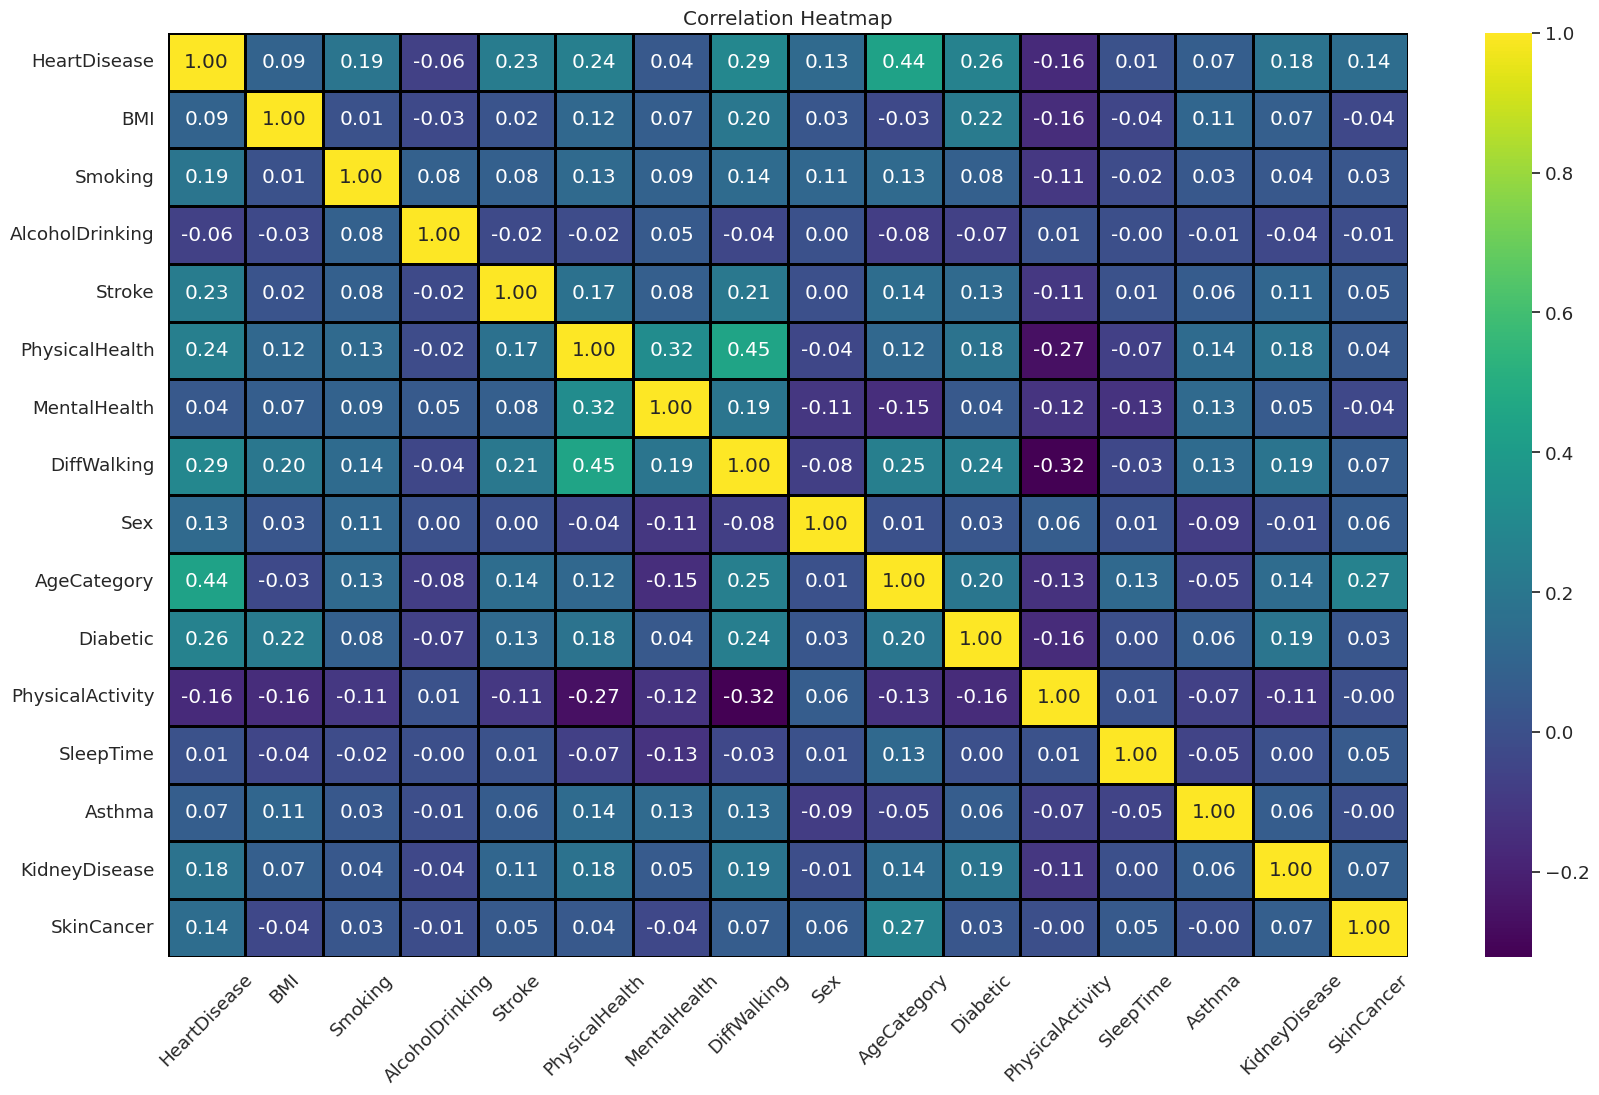

In [ ]:
pearson_corr = df.corr(method='pearson')
# Plot heatmap
plt.figure(figsize=(20, 12))
sns.set(font_scale=1.2)
sns.heatmap(pearson_corr, annot=True, cmap='viridis', fmt=".2f", linewidths=1, linecolor='black')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

#Machine Learning & Deep Learning**


## Creating training and test data

In [ ]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
54862,1,32.22,1,0,0,14.0,30.0,0,0,6.0,0,1,9.0,0,0,0
44729,1,33.28,0,0,1,20.0,0.0,1,1,11.0,0,0,8.0,0,1,0
113611,1,37.42,0,0,0,8.0,0.0,0,0,9.0,0,1,6.0,0,0,0
188517,1,20.53,1,0,0,0.0,0.0,0,1,12.0,0,1,6.0,0,0,0
259202,1,32.12,1,0,0,0.0,0.0,1,0,6.0,0,1,6.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295094,0,26.45,0,0,0,0.0,0.0,0,0,9.0,0,1,7.0,0,0,0
240048,0,41.50,1,0,0,0.0,5.0,0,0,6.0,0,1,7.0,0,0,0
103684,0,16.76,1,0,0,0.0,15.0,0,0,0.0,0,0,7.0,0,0,0
189407,0,41.84,0,0,0,0.0,0.0,0,1,1.0,1,0,8.0,0,0,0


In [ ]:
y = df['HeartDisease']
X = df.drop(columns=['HeartDisease'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dtype('int64')

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    # Plot confusion matrix as heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()



from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix

def display_classification_results(y_test, predictions):
    """
    Display classification evaluation metrics.

    Parameters:
        y_test (array-like): True labels.
        predictions (array-like): Predicted labels.

    Returns:
        None
    """
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    pr_auc = average_precision_score(y_test, predictions)
    confusion_mat = confusion_matrix(y_test, predictions)

    # Print the metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC-AUC Score:", roc_auc)
    print("PR-AUC Score:", pr_auc)


# Example usage:
# display_classification_results(y_test, predictions)


##Logistic Regression Model

Logistic Regression GridSearch

In [ ]:

# Define hyperparameters grid
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

# Create grid search
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',  # Use accuracy as the metric for evaluation
                           verbose=1,
                           n_jobs=-1)  # Use all available CPU cores

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters:", grid_search.best_params_)

# Best model found
best_model = grid_search.best_estimator_

# Evaluate best model on the test set
best_model_predictions = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, best_model_predictions)
print("Best model accuracy:", best_accuracy)


Best parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best model accuracy: 0.912881689832549


Accuracy: 0.7451141552511416
Precision: 0.7271008764392507
Recall: 0.7786161207213839
F1 Score: 0.7519772505109747
ROC-AUC Score: 0.7453631727609821
PR-AUC Score: 0.6759954774848778


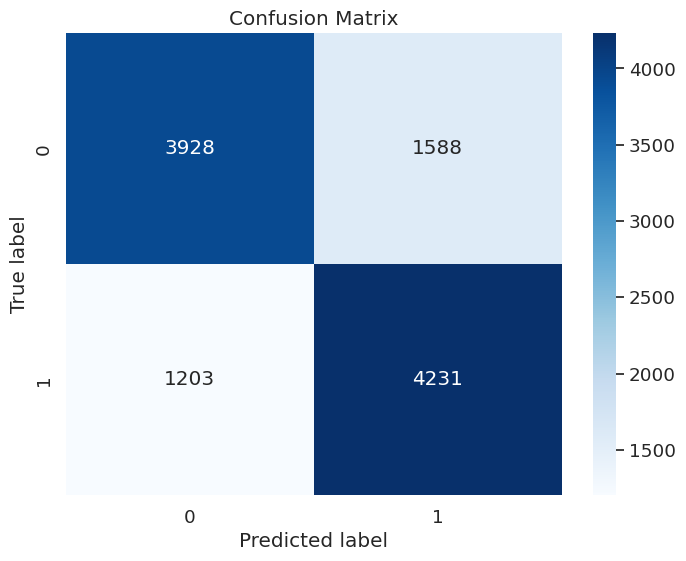

In [ ]:
# Initializing the logistic regression model
logistic_model = LogisticRegression(max_iter=1000,C=0.01,penalty='l1',solver='liblinear')

# Training the model
logistic_model.fit(X_train, y_train)

# Making predictions on the testing set
predictions = logistic_model.predict(X_test)

# Evaluating the model's accuracy


display_classification_results(y_test,predictions)
plot_confusion_matrix(y_test,predictions)

1.0

##**Random Forest Classifier**

Random Forest GridSearch

In [ ]:

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
    'criterion':['gini','“entropy”','“log_loss”',],
}

# Create grid search
rf_grid_search = GridSearchCV(estimator=rf_model,
                              param_grid=param_grid,
                              cv=5,  # 5-fold cross-validation
                              scoring='accuracy',  # Use accuracy as the metric for evaluation
                              verbose=1,
                              n_jobs=-1)  # Use all available CPU cores

# Perform grid search
rf_grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters:", rf_grid_search.best_params_)

# Best model found
best_rf_model = rf_grid_search.best_estimator_

# Evaluate best model on the test set
best_rf_predictions = best_rf_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_predictions)
print("Best Random Forest model accuracy:", best_rf_accuracy)


Random Forest Accuracy: 0.7127853881278539
Accuracy: 0.7127853881278539
Precision: 0.6964132486699846
Recall: 0.7467795362532205
F1 Score: 0.7207175206464791
ROC-AUC Score: 0.7130380639931803
PR-AUC Score: 0.6457292633389907


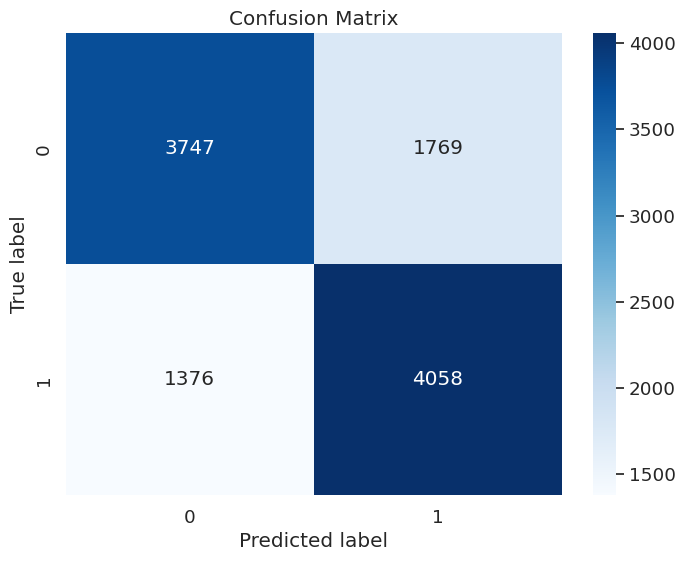

In [ ]:
# Initializing the Random Forest model
rf_model = RandomForestClassifier()

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions on the testing set
rf_predictions = rf_model.predict(X_test)

# Evaluating the model's accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

display_classification_results(y_test, rf_predictions)
plot_confusion_matrix(y_test,rf_predictions)

##**k-Nearest Neighbors**

######GridSearch

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
              'weights': ['uniform', 'distance'],
              'p': [1, 2, 3,]}  # Adjust as needed

# Instantiate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Find best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


######KNN Training

Accuracy: 0.6325114155251141
Precision: 0.7101967799642218
Recall: 0.4383511225616489
F1 Score: 0.5421028675466546
ROC-AUC Score: 0.6310682371328911
PR-AUC Score: 0.5900370169241995


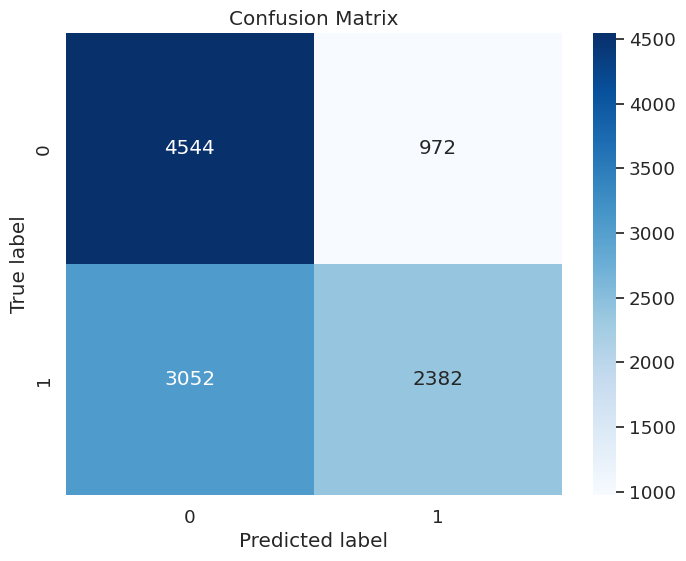

In [ ]:

# Initializing the KNN model
knn_model = KNeighborsClassifier(n_neighbors=2)

# Training the model
knn_model.fit(X_train, y_train)

# Making predictions on the testing set
knn_predictions = knn_model.predict(X_test)

# Evaluating the model's accuracy
display_classification_results(y_test, knn_predictions)
plot_confusion_matrix(y_test,knn_predictions)

##**Naive Bayes**

Accuracy: 0.7074885844748858
Precision: 0.7564957461485399
Recall: 0.6054471843945528
F1 Score: 0.6725953184094857
ROC-AUC Score: 0.7067301186657319
PR-AUC Score: 0.6538173062700807


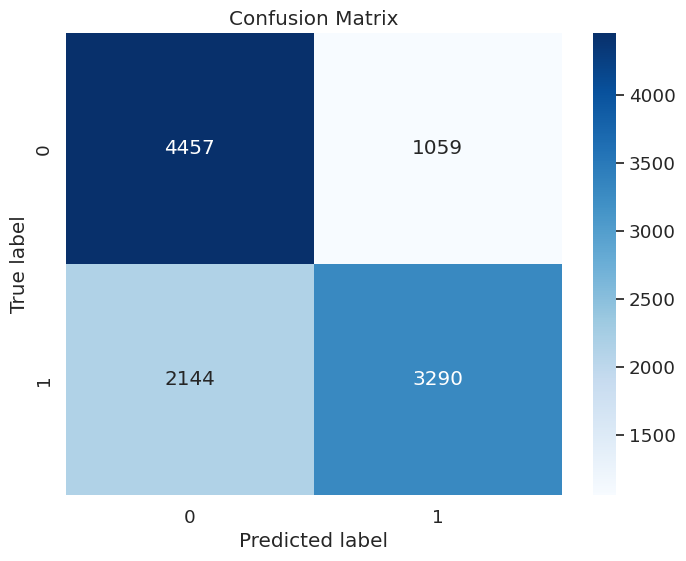

In [ ]:
# Initializing the Naive Bayes model
nb_model = GaussianNB()

# Training the model
nb_model.fit(X_train, y_train)

# Making predictions on the testing set
nb_predictions = nb_model.predict(X_test)

# Evaluating the model's accuracy
display_classification_results(y_test, nb_predictions)
plot_confusion_matrix(y_test,nb_predictions)

##**Decision Tree**

######GridSearch




In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a range of values for max_depth to search
param_grid = {'max_depth': range(1,20)}  # Adjust the range as needed

# Initialize GridSearchCV with the DecisionTreeClassifier
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameter
best_max_depth = grid_search.best_params_['max_depth']
print("Best max_depth:", best_max_depth)


Best max_depth: 5


DecisionTreeClassifier(max_depth=5)

######Training DecisionTree

Accuracy: 0.7199086757990868
Precision: 0.6655939555058066
Recall: 0.875414059624586
F1 Score: 0.7562196963675384
ROC-AUC Score: 0.7210645352510167
PR-AUC Score: 0.6444967906691891


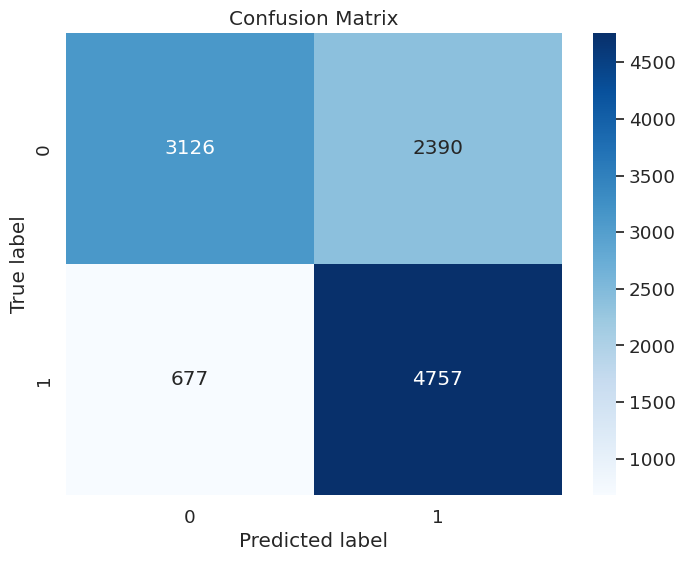

In [ ]:


# Initializing the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5)

# Training the model
dt_model.fit(X_train, y_train)

# Making predictions on the testing set
dt_predictions = dt_model.predict(X_test)

# Evaluating the model's accuracy

display_classification_results(y_test, dt_predictions)
plot_confusion_matrix(y_test,dt_predictions)


######DecisionTree Visualization

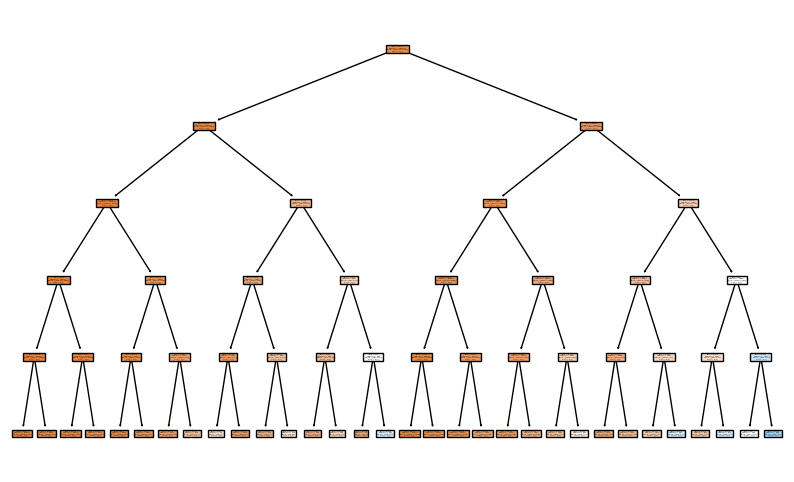

In [ ]:

# Plotting the decision tree
plt.figure(figsize=(10,6))  # Adjust the figure size if needed
plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=True)
plt.show()


##**Neural Networks**

In [ ]:
def plot_training_history(history):
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    # Plot training & validation accuracy values
    axs[0].plot(history.history['accuracy'], label='Training Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend()

    # Plot training & validation loss values
    axs[1].plot(history.history['loss'], label='Training Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))


SystemError: GPU device not found

In [ ]:
"""
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from kerastuner.tuners import RandomSearch

# Define the model-building function
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=64, max_value=256, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=hp.Int('units', min_value=64, max_value=256, step=32), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Adjust the number of trials as needed
    directory='my_dir',
    project_name='my_project')

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
"""

Num GPUs Available: 1


In [ ]:

# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
        Dense(128, activation='relu'),

    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


1095/1095 [==============================] - 3s 3ms/step - loss: 0.5054 - accuracy: 0.7537 - val_loss: 0.5072 - val_accuracy: 0.7554
Epoch 12/200
1095/1095 [==============================] - 3s 3ms/step - loss: 0.5043 - accuracy: 0.7533 - val_loss: 0.5069 - val_accuracy: 0.7562
Epoch 13/200
1095/1095 [==============================] - 3s 3ms/step - loss: 0.5037 - accuracy: 0.7557 - val_loss: 0.5118 - val_accuracy: 0.7491
Epoch 14/200
1095/1095 [==============================] - 4s 4ms/step - loss: 0.5031 - accuracy: 0.7546 - val_loss: 0.5155 - val_accuracy: 0.7522
Epoch 15/200
1095/1095 [==============================] - 3s 3ms/step - loss: 0.5031 - accuracy: 0.7559 - val_loss: 0.5046 - val_accuracy: 0.7550
Epoch 16/200
1095/1095 [==============================] - 3s 3ms/step - loss: 0.5030 - accuracy: 0.7564 - val_loss: 0.5071 - val_accuracy: 0.7533
Epoch 17/200
1095/1095 [==============================] - 3s 3ms/step - loss: 0.5029 - accuracy: 0.7554 - val_loss: 0.5140 - val_accuracy

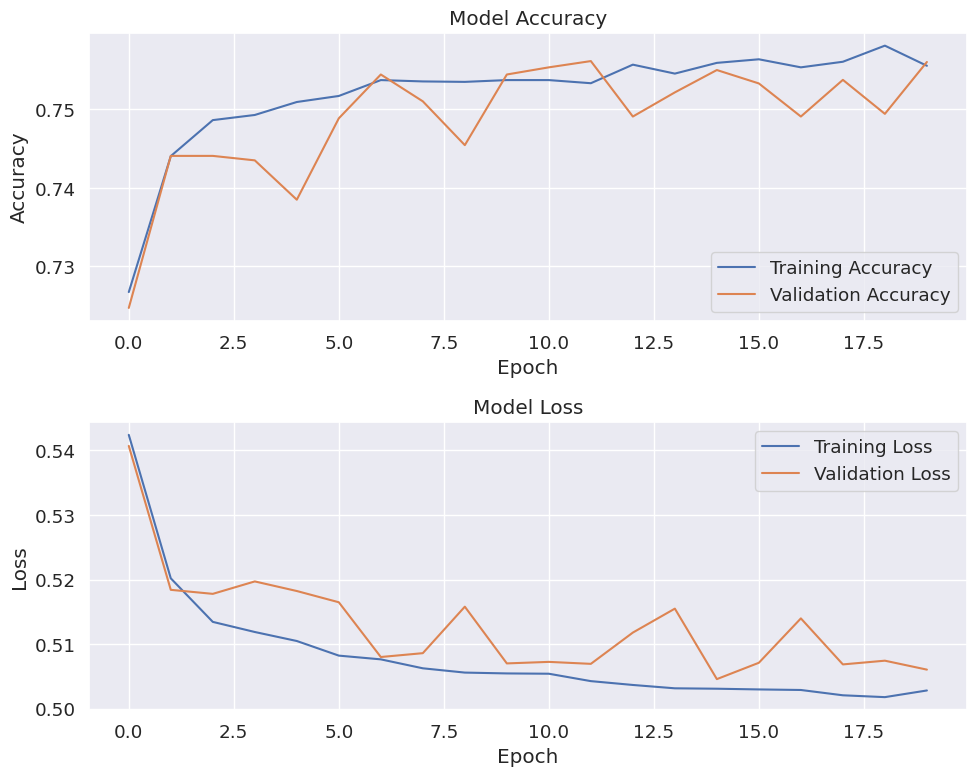

In [ ]:
plot_training_history(history)

Found GPU at: /device:GPU:0


In [ ]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               2048      
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 35201 (137.50 KB)
Trainable params: 35201 (137.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
